In [43]:
import numpy as np

a = np.arange(-10, 12, 3)
d = a
print(a, type(a))

b = np.where(a>0)
print(list(zip(*np.where(a > 4))))
print(a[b[0]])


[-10  -7  -4  -1   2   5   8  11] <class 'numpy.ndarray'>
[(5,), (6,), (7,)]
[ 2  5  8 11]


In [1]:
import pytplot
pytplot.__path__

['/home/www/.local/lib/python3.8/site-packages/pytplot']

In [12]:
import numpy as np
import pytplot, pyspedas
from pytplot import tplot
detail_data = np.arange(10)
rough_data = np.arange(0,10, 3)
print(detail_data, rough_data)
pytplot.store_data('detail_data', data = {'x': detail_data, 'y': detail_data})
pytplot.store_data('rough_data', data = {'x': rough_data, 'y': rough_data})
pytplot.tplot_names()

[0 1 2 3 4 5 6 7 8 9] [0 3 6 9]
0 : tinterpol_test
1 : tinterpol_test1
2 : tinterpol_test1-itrp
3 : tinterpol_test-itrp
4 : detail_data
5 : rough_data
6 : rough_data-itrp


['tinterpol_test',
 'tinterpol_test1',
 'tinterpol_test1-itrp',
 'tinterpol_test-itrp',
 'detail_data',
 'rough_data',
 'rough_data-itrp']

In [13]:
pyspedas.tinterpol('rough_data', interp_to='detail_data')


tinterpol (linear) was applied to: rough_data-itrp


In [14]:
x = pytplot.get_data('rough_data')
y = pytplot.get_data('detail_data')
z = pytplot.get_data('rough_data-itrp')
x,y,z

(variable(times=array([0, 3, 6, 9]), y=array([0, 3, 6, 9])),
 variable(times=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), y=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 variable(times=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), y=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])))

In [16]:
import load 


In [23]:
importer = load.orb(trange=['2000-01-01', '2000-01-02'])

In [24]:
import pytplot
pytplot.tplot_names()

0 : tinterpol_test
1 : tinterpol_test1
2 : tinterpol_test1-itrp
3 : tinterpol_test-itrp
4 : detail_data
5 : rough_data
6 : rough_data-itrp
7 : akb_Pass
8 : akb_ILAT
9 : akb_MLAT
10 : akb_MLT
11 : akb_ALT


['tinterpol_test',
 'tinterpol_test1',
 'tinterpol_test1-itrp',
 'tinterpol_test-itrp',
 'detail_data',
 'rough_data',
 'rough_data-itrp',
 'akb_Pass',
 'akb_ILAT',
 'akb_MLAT',
 'akb_MLT',
 'akb_ALT']

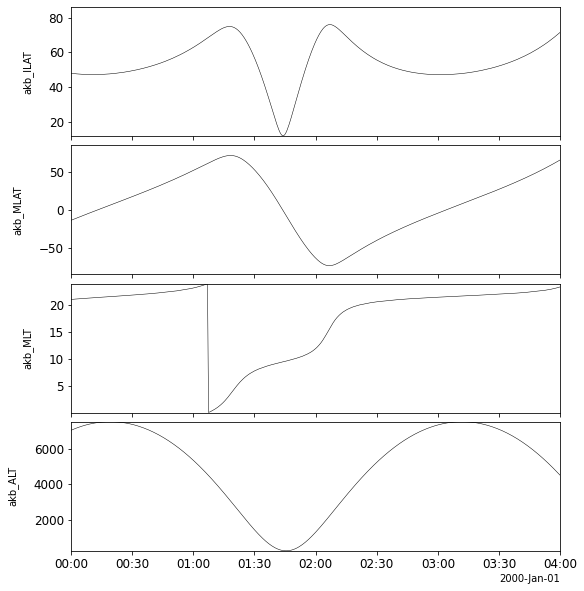

In [27]:
pytplot.tlimit(['2000-01-01 00:00:00', '2000-01-01 04:00:00'])
pytplot.tplot(['akb_ILAT', 'akb_MLAT', 'akb_MLT', 'akb_ALT'])

In [11]:
import Akebono_orb_load

importer = Akebono_orb_load.Akebono_orb_load('20000101')
importer.orb()

ParserError: Unknown string format: 2010/10/00/00:0:

13-Jul-22 15:21:06: /usr/local/lib/python3.8/dist-packages/pytplot/MPLPlotter/tplot.py:236: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  this_axis.set_ylim(yrange)



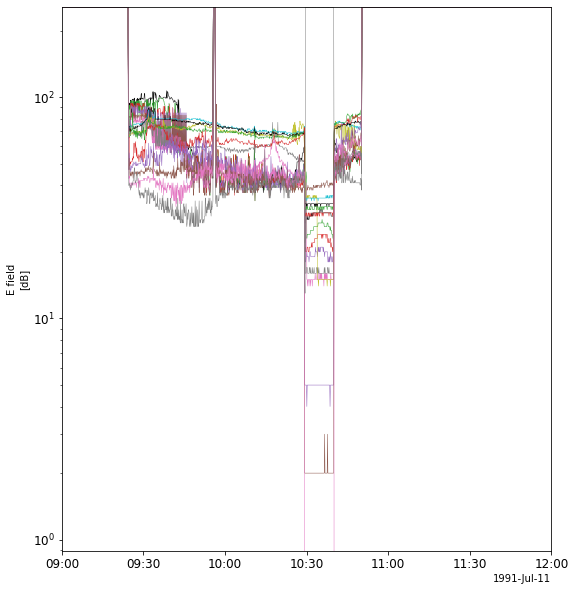

In [12]:
import load
import pytplot
import numpy as np
from pytplot import options
load.mca(trange=['1991-07-11', '1991-07-12'])

Emax = pytplot.get_data('Emax')
Emax.y
Bmax = pytplot.get_data('Bmax')
type(Emax.y)
pytplot.tlimit(['1991-07-11 09:00:00', '1991-07-11 12:00:00'])
pytplot.tplot('Emax')

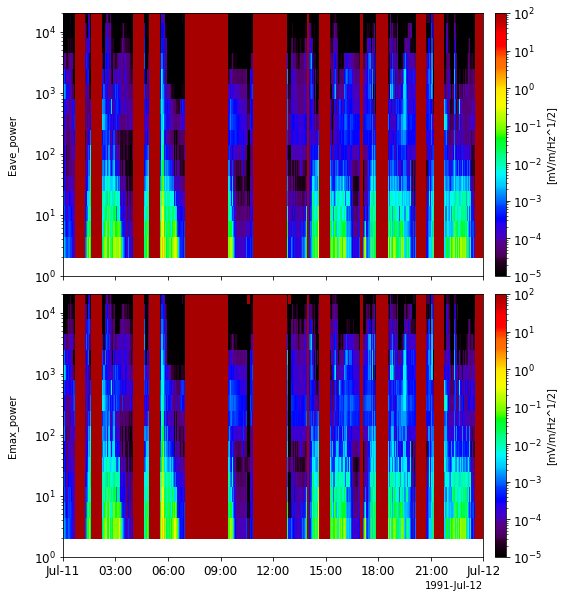

In [9]:
options(['Eave_power', 'Emax_power'], 'spec', 1)
options(['Eave_power', 'Emax_power'], 'ylog', 1)
options(['Eave_power', 'Emax_power'], 'zlog', 1)
options(['Eave_power', 'Emax_power'], 'zrange', [1e-5, 100])
options(['Eave_power', 'Emax_power'], 'yrange', [1, 2e4])
options(['Eave_power', 'Emax_power'], 'ztitle', '[mV/m/Hz^1/2]')
pytplot.tplot(['Eave_power', 'Emax_power'])

07-Jul-22 08:03:31: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 08:03:31: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 08:03:31: <ipython-input-40-09691759de28>:28: DeprecationWarning: invalid escape sequence \s
  plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')



Text(0, 0.5, '')

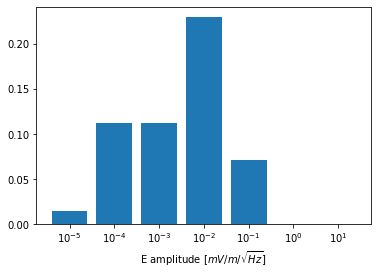

In [40]:
Emax = pytplot.get_data('Emax_amplitude')
Emax_T = Emax.y.T
Emax_1ch = Emax_T[0]
Emax_25dB = (10**(253/20)) * (1e-6)  / np.sqrt(3.16*0.3)

left = np.arange(7)
Emax_amp_0 = Emax_1ch.size
Emax_amp_1 = Emax_1ch[Emax_1ch < 1e1].size 
Emax_amp_2 = Emax_1ch[Emax_1ch < 1].size
Emax_amp_3 = Emax_1ch[Emax_1ch < 1e-1].size
Emax_amp_4 = Emax_1ch[Emax_1ch < 1e-2].size
Emax_amp_5 = Emax_1ch[Emax_1ch < 1e-3].size
Emax_amp_6 = Emax_1ch[Emax_1ch < 1e-4].size
Emax_amp_25dB = Emax_1ch[Emax_1ch > Emax_25dB].size
Emax_seconds = np.array([Emax_amp_6/Emax_amp_0,
               (Emax_amp_5-Emax_amp_6)/Emax_amp_0, 
               (Emax_amp_4-Emax_amp_5)/Emax_amp_0, 
               (Emax_amp_3-Emax_amp_4)/Emax_amp_0, 
               (Emax_amp_2-Emax_amp_3)/Emax_amp_0, 
               (Emax_amp_1-Emax_amp_2)/Emax_amp_0,
               (Emax_amp_0-Emax_amp_1-Emax_amp_25dB)/Emax_amp_0])


import matplotlib.pyplot as plt
labels = ['$10^{-5}$', '$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^0$','$10^1$']
plt.figure()
plt.bar(left, Emax_seconds, tick_label = labels)
plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')
plt.ylabel('')